# Some visualizations of LDA proportions and Economics data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 99
from sklearn.linear_model import LinearRegression

In [8]:
cat_dict = {1: 'Country',
             3: 'Psyche/Regret',
             4: 'People',
             5: 'Craze/Party',
             7: 'Hip-Hop',
             8: 'Foreign Songs',
             9: 'Noise/Sounds',
             10: 'World/Earth',
             0: 'Dance/Rhythm',
             2: 'Affection',
             6: 'Desire'}

In [3]:
econ = pd.read_csv('../data/econ_master.csv')
lda = pd.read_csv("../data/lda_monthly_cat.csv")
econ = econ.drop("Unnamed: 0", axis=1)
lda = lda.drop("Unnamed: 0", axis=1)
econ["MonthIDNum"] = econ["MonthID"]
lda["MonthIDNum"] = lda["MonthID"]
econ["MonthID"] = [i/12 for i in econ["MonthID"]]
lda["MonthID"] = [i/12 for i in lda["MonthID"]]

In [4]:
econ_target = ["S&P", "Unemp", "Food&Beverage", "GDP", "Income"]
econ_target_detrended = ["{}_detrended".format(i) for i in econ_target]
lda_target = lda.columns.tolist()[1:12]
lda_target_detrended = ["{}_detrended".format(i) for i in lda_target]

In [5]:
econ.head()

DATE      MonthID        S&P  S&P_detrended  Unemp  Unemp_detrended  \
0  1967-02-01  1967.166667  86.779999       0.169998    3.8             -0.1   
1  1967-03-01  1967.250000  90.199997       3.419998    3.8              0.0   
2  1967-04-01  1967.333333  94.010002       3.810005    3.8              0.0   
3  1967-05-01  1967.416667  89.080002      -4.930000    3.8              0.0   
4  1967-06-01  1967.500000  90.639999       1.559997    3.9              0.1   

   Food&Beverage  Food&Beverage_detrended          GDP  GDP_detrended  Income  \
0           34.7                     -0.1  4536.517333            NaN  3170.2   
1           34.7                      0.0  4537.443667       0.926333  3194.0   
2           34.6                     -0.1  4538.370000       0.926333  3193.0   
3           34.6                      0.0  4552.683000      14.313000  3199.5   
4           34.9                      0.3  4566.996000      14.313000  3211.3   

   Income_detrended  MonthIDNum  
0               6.2       23606  
1              23.8       23607  
2              -1.0       23608  
3               6.5       23609  
4              11.8       23610

In [6]:
lda.head()

MonthID  cat0_avg  cat1_avg  cat2_avg  cat3_avg  cat4_avg  cat5_avg  \
0  1967.166667  0.200723  0.284766  0.407976  0.331593  0.234274  0.202242   
1  1967.250000  0.198508  0.311500  0.403727  0.335531  0.230870  0.193549   
2  1967.333333  0.211564  0.314926  0.386028  0.334890  0.204012  0.165804   
3  1967.416667  0.215014  0.291681  0.404675  0.359084  0.199387  0.147695   
4  1967.500000  0.242854  0.322881  0.375230  0.381099  0.199572  0.181888   

   cat6_avg  cat7_avg  cat8_avg  cat9_avg  cat10_avg  cat0_avg_detrended  \
0  0.217612  0.191187  0.033706  0.203303   0.278743           -0.069042   
1  0.231526  0.112184  0.044941  0.183729   0.273775           -0.002215   
2  0.227149  0.107026  0.044941  0.253378   0.297252            0.013056   
3  0.172596  0.127563  0.048627  0.228618   0.304305            0.003450   
4  0.206542  0.109756  0.063018  0.210420   0.323679            0.027840   

   cat1_avg_detrended  cat2_avg_detrended  cat3_avg_detrended  \
0           -0.048844            0.037930            0.002102   
1            0.026734           -0.004249            0.003939   
2            0.003426           -0.017699           -0.000641   
3           -0.023245            0.018647            0.024194   
4            0.031200           -0.029445            0.022015   

   cat4_avg_detrended  cat5_avg_detrended  cat6_avg_detrended  \
0            0.016207           -0.008594           -0.010597   
1           -0.003403           -0.008693            0.013914   
2           -0.026859           -0.027745           -0.004377   
3           -0.004625           -0.018109           -0.054553   
4            0.000185            0.034192            0.033946   

   cat7_avg_detrended  cat8_avg_detrended  cat9_avg_detrended  \
0            0.061997            0.033706           -0.004401   
1           -0.079003            0.011235           -0.019574   
2           -0.005158            0.000000            0.069648   
3            0.020537            0.003686           -0.024760   
4           -0.017807            0.014391           -0.018198   

   cat10_avg_detrended  MonthIDNum  
0            -0.038519       23606  
1            -0.004968       23607  
2             0.023477       23608  
3             0.007053       23609  
4             0.019374       23610

## Economics Data Visualization

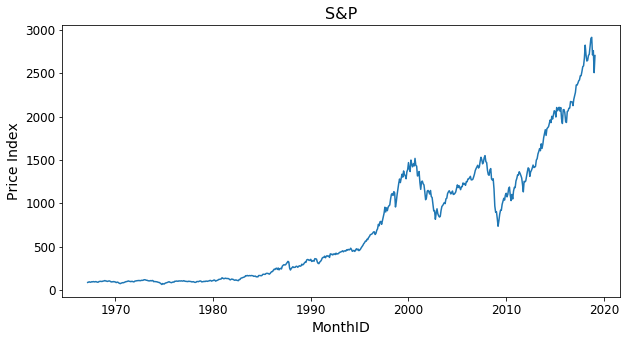

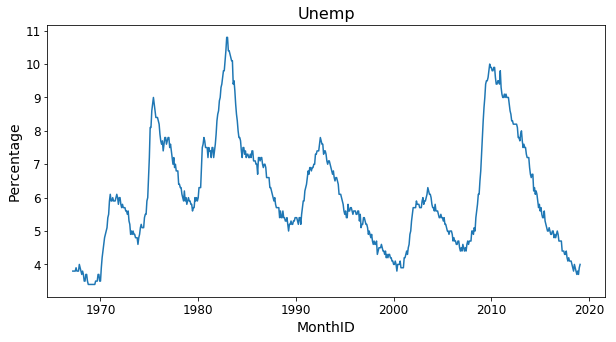

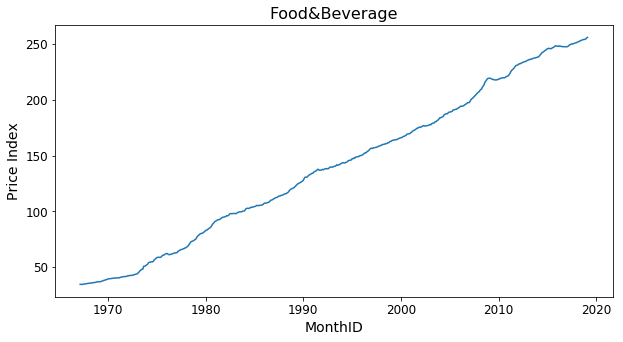

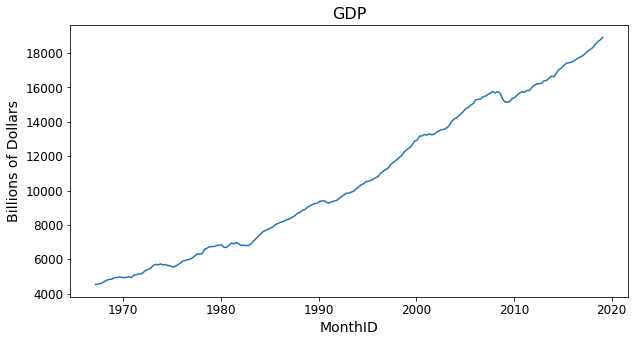

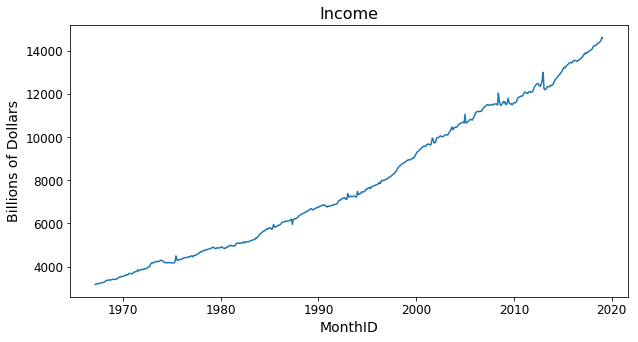

In [7]:
ylabels = ["Price Index", "Percentage", "Price Index", "Billions of Dollars", "Billions of Dollars"]
for j, i in enumerate(econ_target):
    plt.figure(figsize=(10, 5))
    plt.plot(econ["MonthID"], econ[i])
    plt.title(i, fontsize=16)
    plt.xlabel("MonthID",fontsize=14)
    plt.ylabel(ylabels[j], fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig("{}Viz.png".format(i))
    plt.show()

## LDA proportion plots

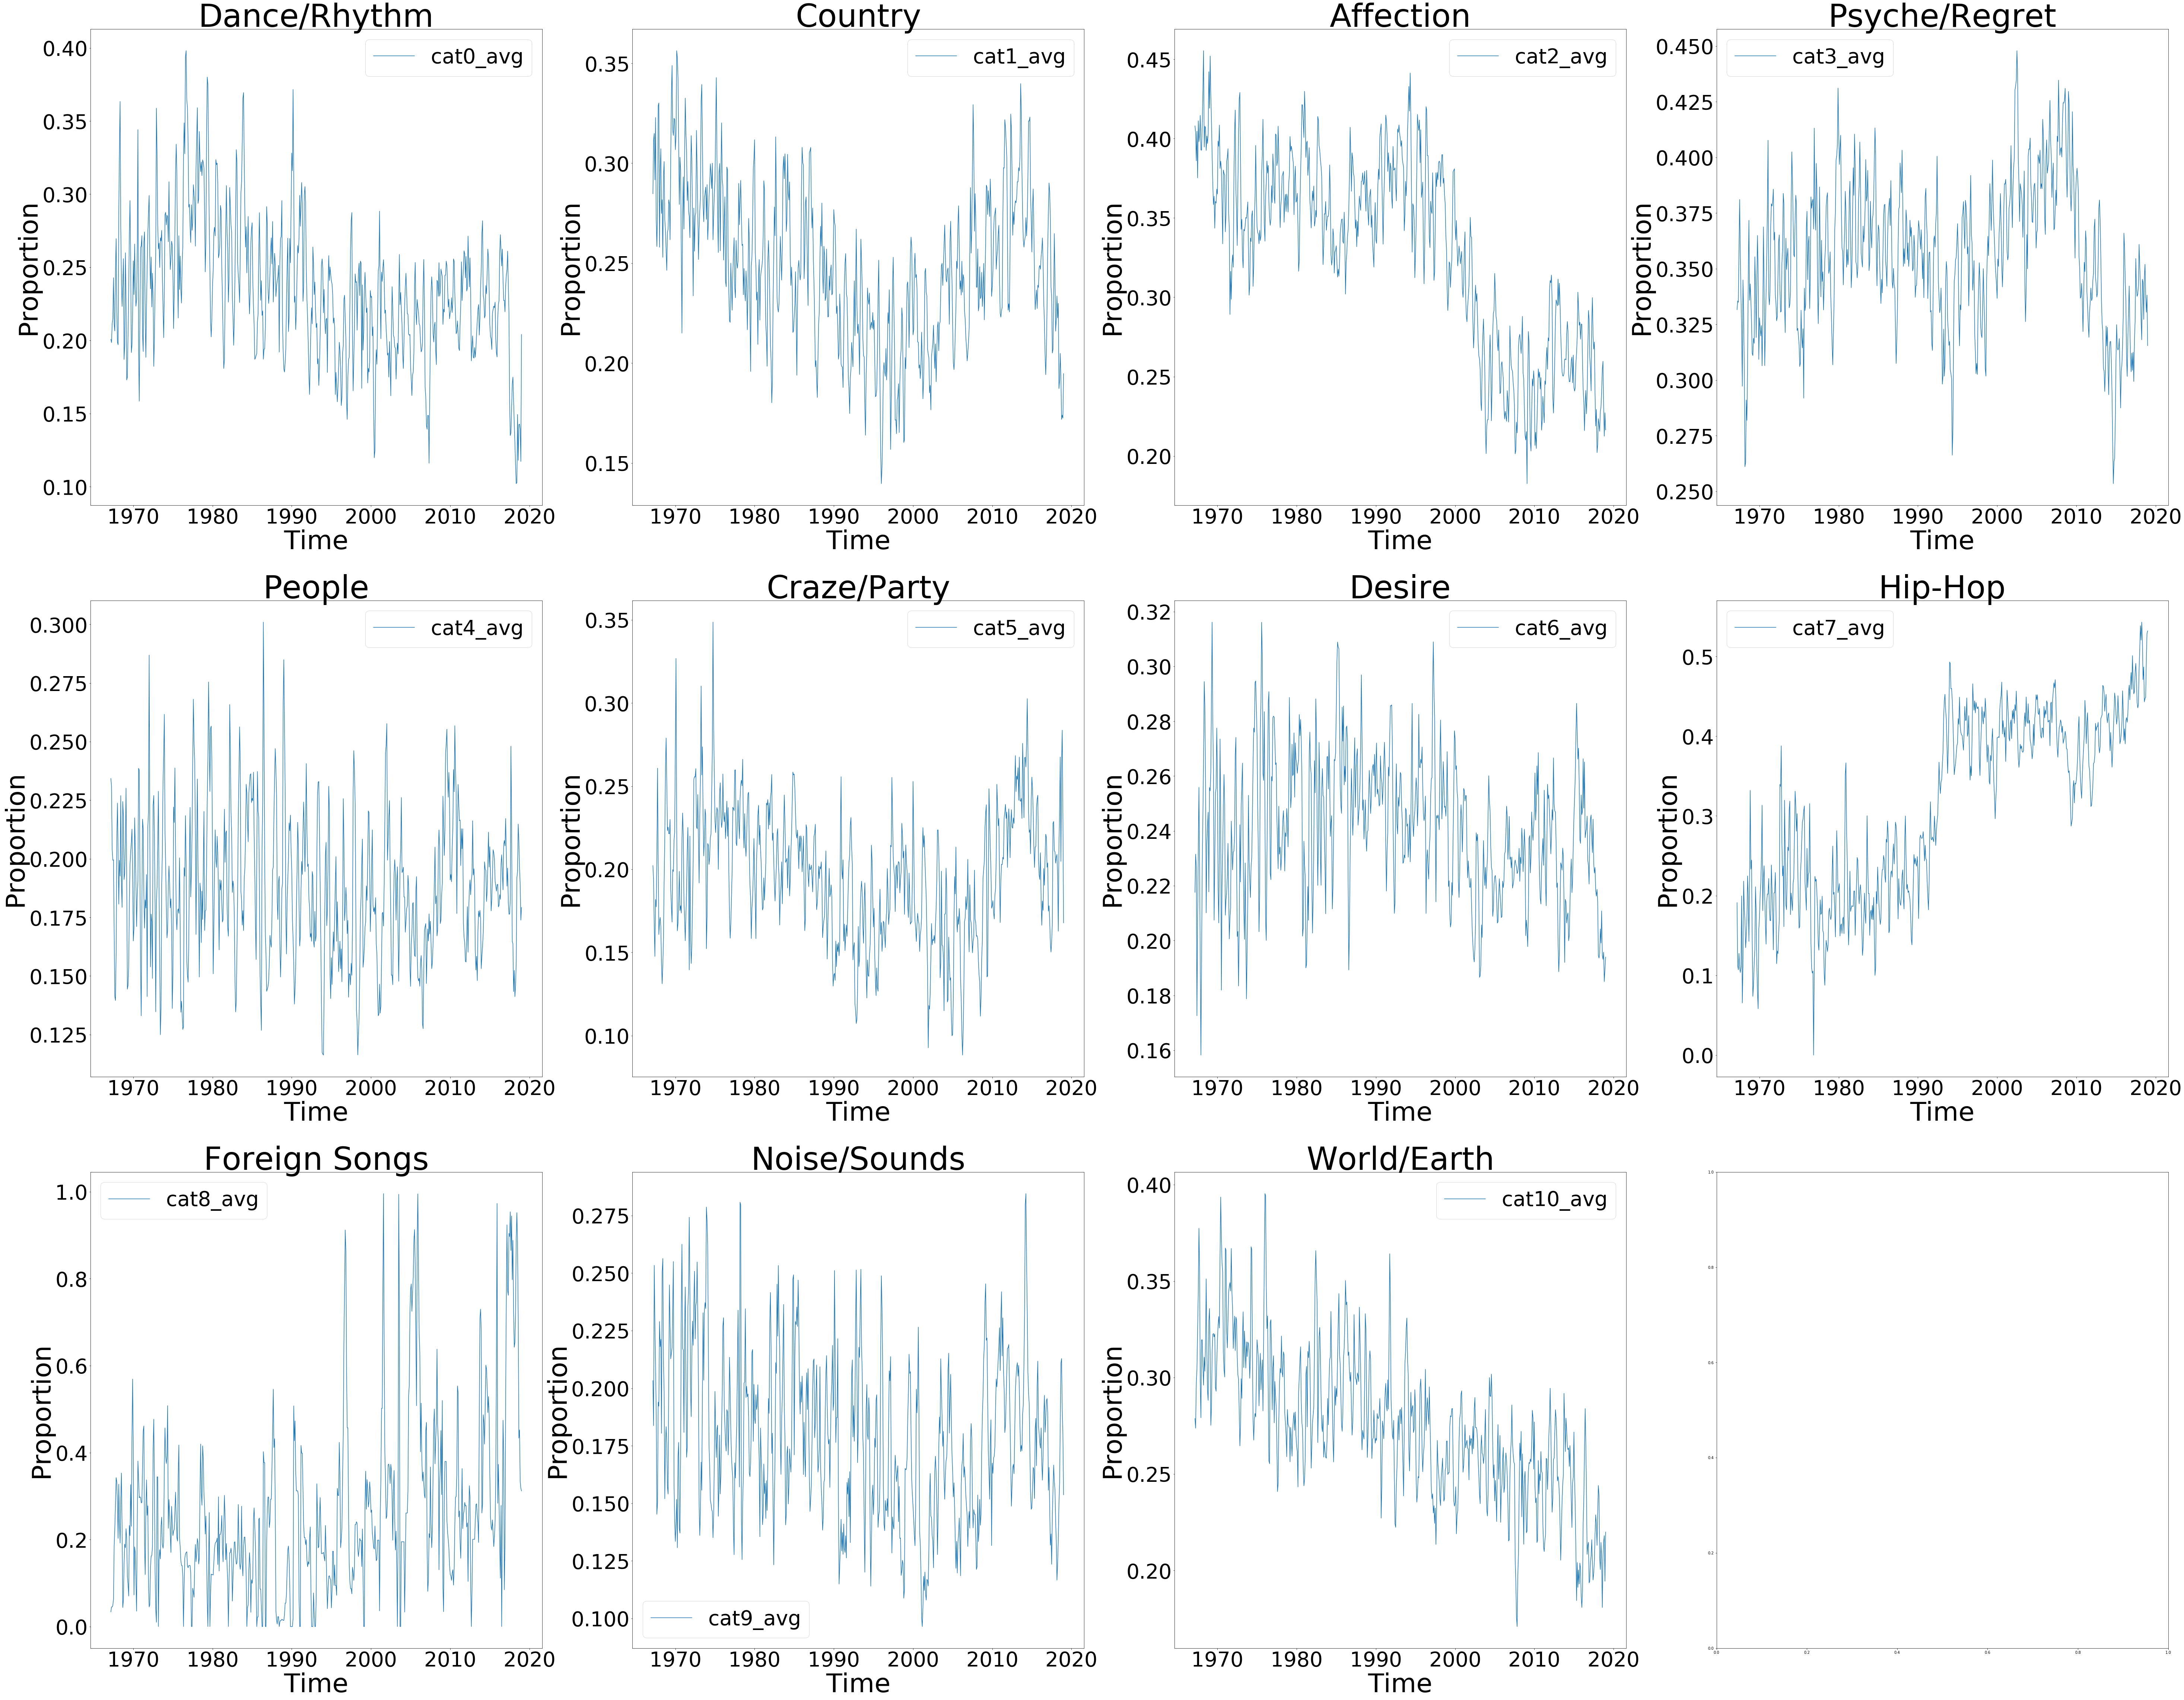

In [21]:
plt.subplots(3, 4, figsize=(100, 80))
for i, j in enumerate(lda_target):
    ax = plt.subplot(3, 4, i+1)
    plt.plot(lda["MonthID"], lda[j])
    plt.title("{}".format(cat_dict[i]), fontsize=85)
    plt.xlabel("Time", fontsize=70)
    plt.ylabel("Proportion", fontsize=70)
    plt.legend(fontsize=55)
    plt.xticks(fontsize=55)
    plt.yticks(fontsize=55)
plt.show()

### Pair Plots of LDA with GDP

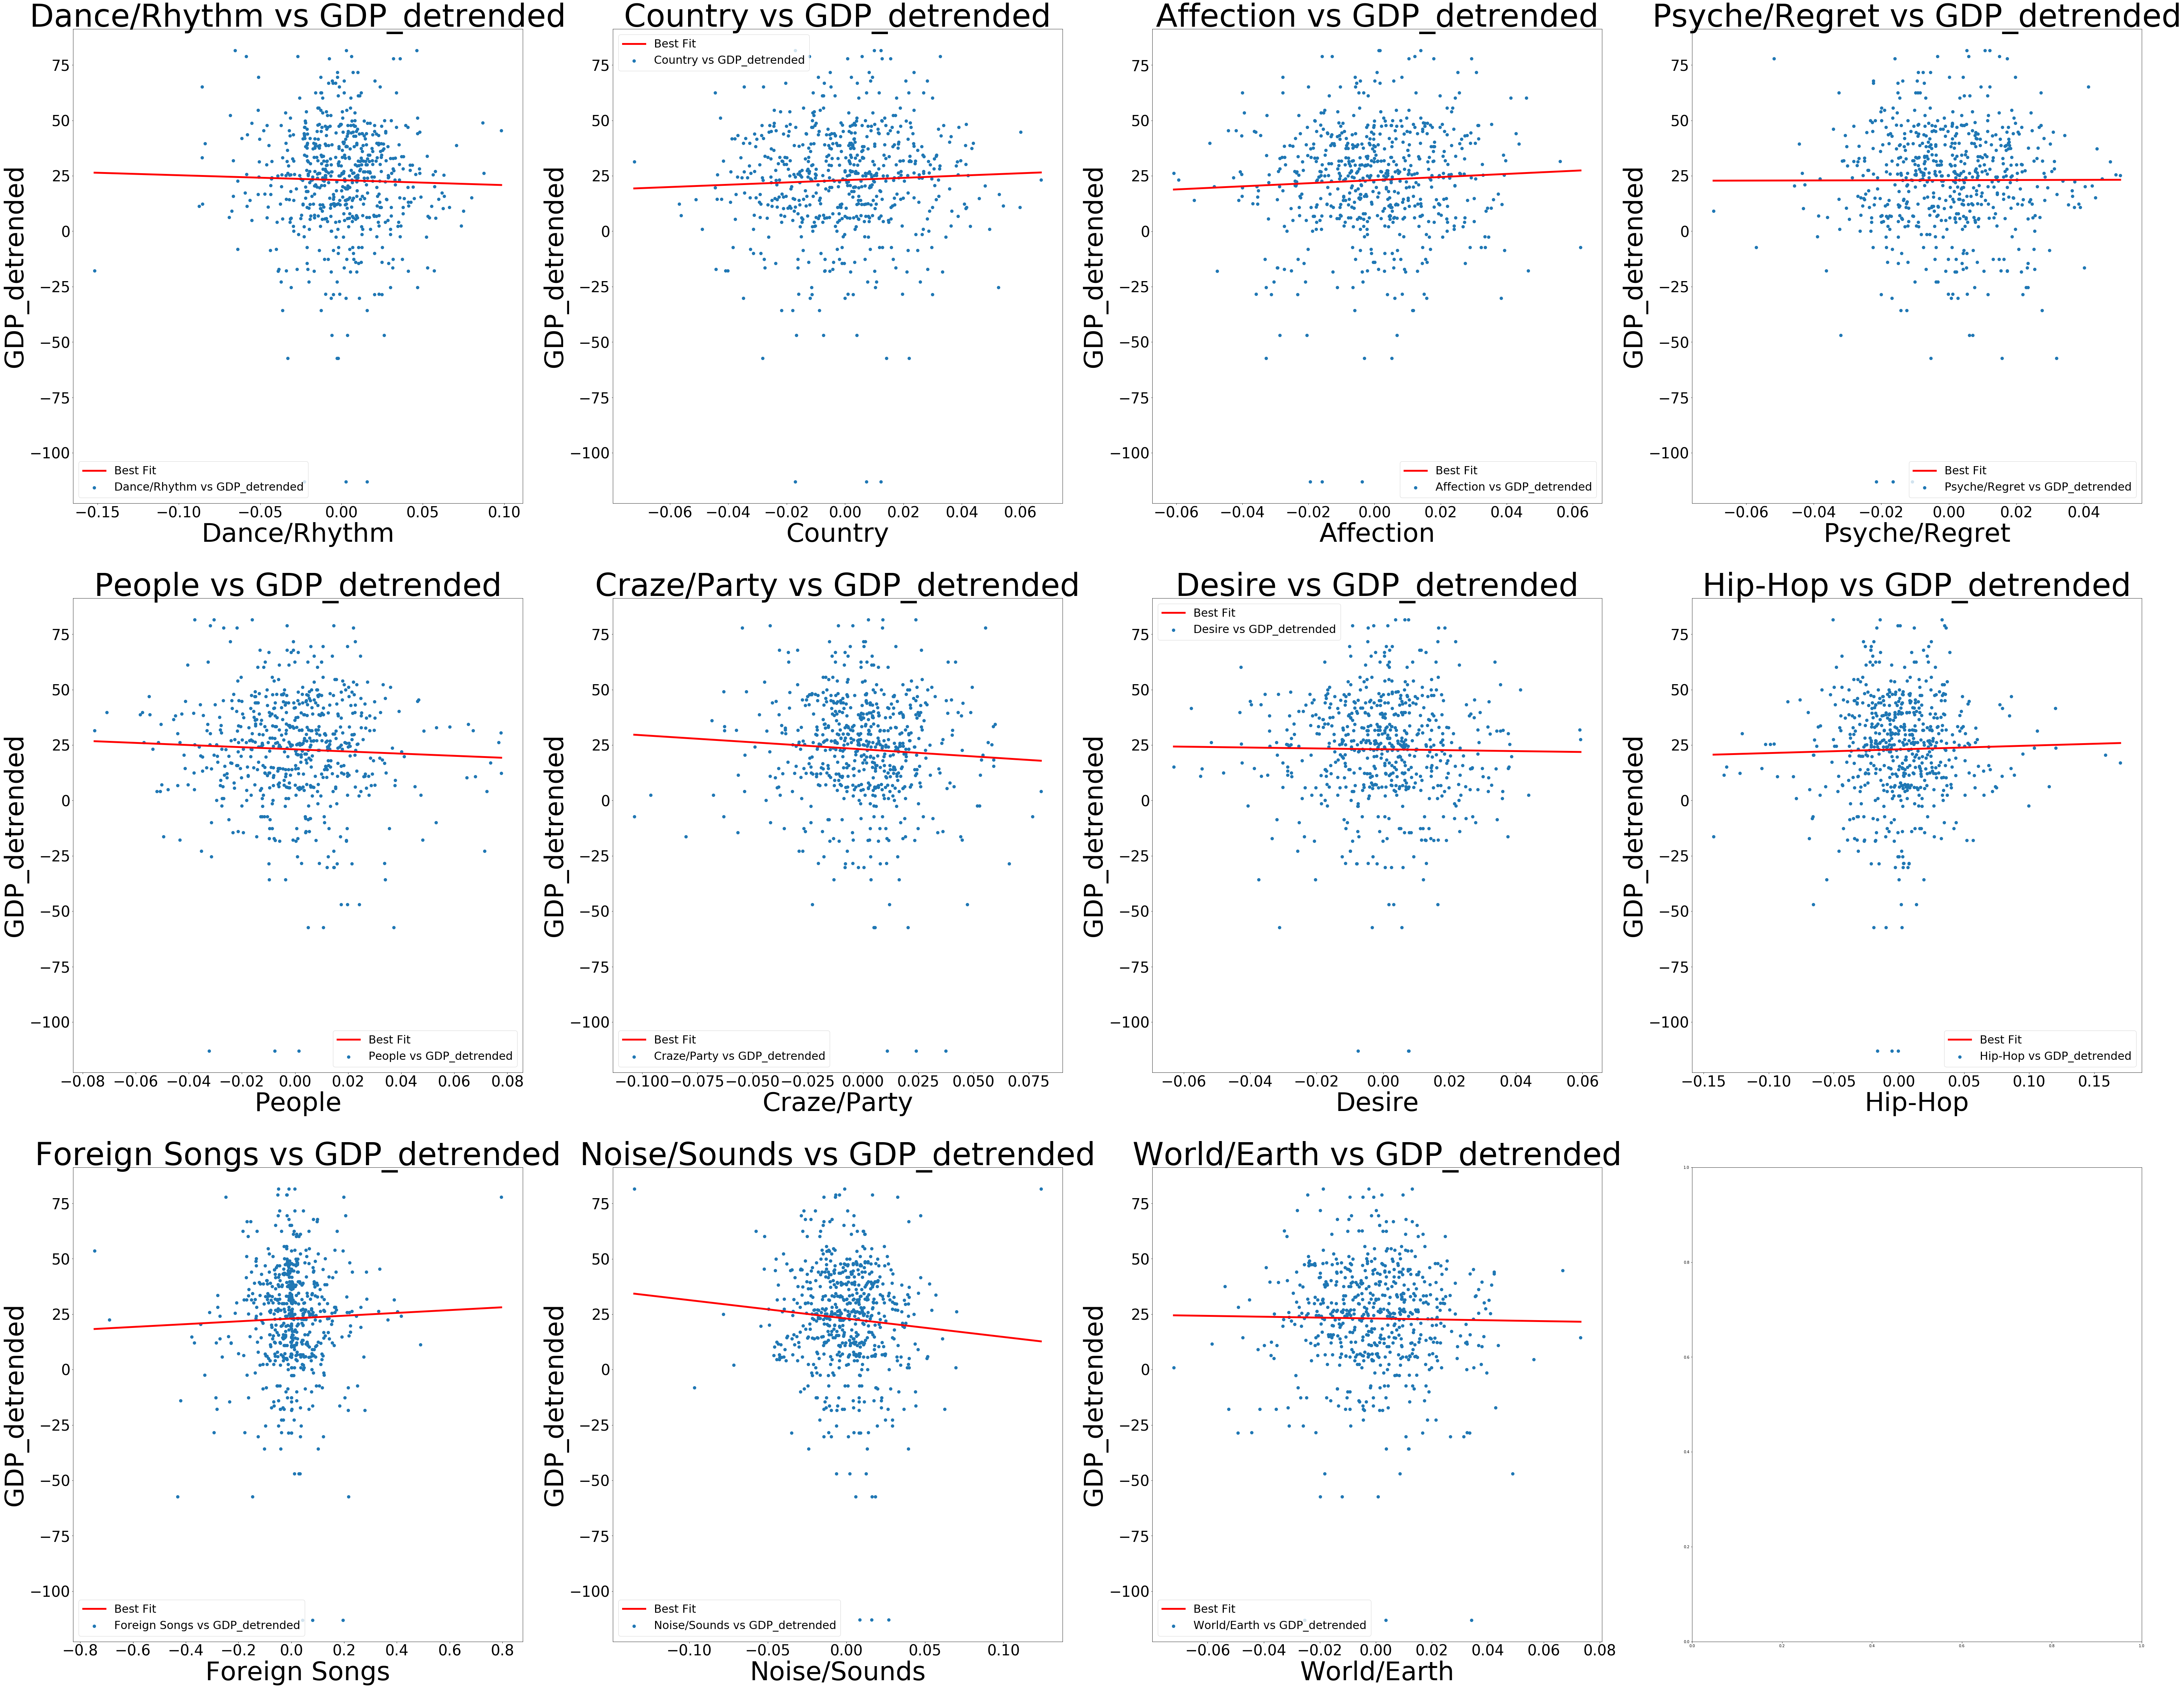

In [18]:
plt.subplots(3, 4, figsize=(100, 80))
temp = econ.copy()
econ_param = "GDP_detrended"
temp = pd.DataFrame(temp.merge(lda, left_on="MonthID", right_on="MonthID", how="inner")).dropna().reset_index()
for i, j in enumerate(lda_target_detrended):
    ax = plt.subplot(3, 4, i+1)
    reg = LinearRegression().fit([[1, z] for z in temp[j]], temp[econ_param])
    plt.plot(np.linspace(min(temp[j]), max(temp[j]), 100), 
             reg.predict([[1, z] for z in np.linspace(min(temp[j]), max(temp[j]), 100)]), 
             linewidth=5, color='r', label="Best Fit")
    plt.scatter(temp[j], temp[econ_param ], linewidth = 3, label = "{} vs {}".format(cat_dict[i], econ_param))
    plt.title("{} vs {}".format(cat_dict[i], econ_param ), fontsize=85)
    plt.xlabel(cat_dict[i], fontsize=70)
    plt.ylabel(econ_param, fontsize=70)
    plt.legend(fontsize=30)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
plt.show()